In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time

In [2]:
import filters

This notebook contains implementation of common filters. The first part contains comparison of naive implementation and separable filter implementation. You may find that separable one is much slower. This may due to the speed of np.sum is almost or even less than O(n).

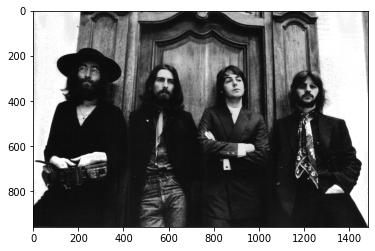

In [3]:
# Import sample image
beatle = np.array(Image.open('../../images/beatles.png').convert('L'))
# Display image
plt.gray()
plt.imshow(beatle)
plt.show()

First part: Box, Gaussian and Laplacian of Gaussian

10.859552145004272s used


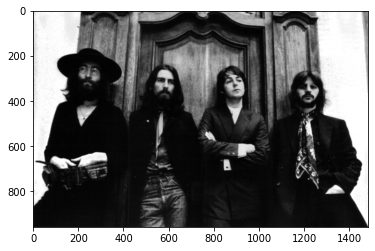

In [4]:
# Box filter
t = time()
img_box,ker_box = filters.box(beatle,4,4)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_box.astype('uint8'))
plt.show()

18.61991786956787s used


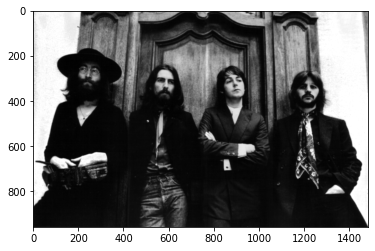

In [5]:
# Box filter (separable)
t = time()
img_sepbox = filters.sep_conv(beatle,ker_box)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_sepbox.astype('uint8'))
plt.show()

11.795768976211548s used


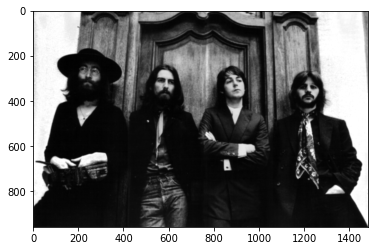

In [6]:
# Gaussian filter
t = time()
img_gauss,ker_gauss = filters.gaussian(beatle)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_gauss.astype('uint8'))
plt.show()

18.81249189376831s used


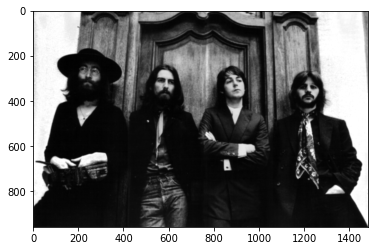

In [7]:
# Gaussian filter (separable)
t = time()
img_sepgauss = filters.sep_conv(beatle,ker_gauss)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_sepgauss.astype('uint8'))
plt.show()

11.030289888381958s used


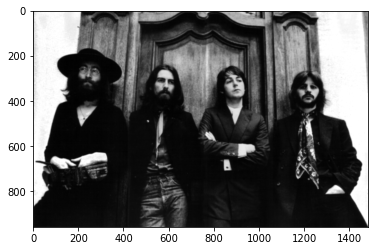

In [8]:
# LoG filter
t = time()
img_log,ker_log = filters.LoG(beatle)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_log.astype('uint8'))
plt.show()

18.926416158676147s used


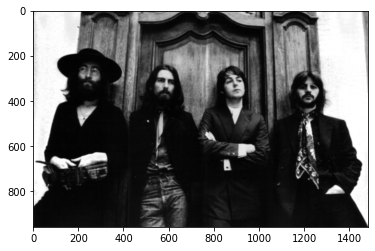

In [9]:
# LoG filter (separable)
t = time()
img_seplog = filters.sep_conv(beatle,ker_log)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_seplog.astype('uint8'))
plt.show()

11.885111808776855s used


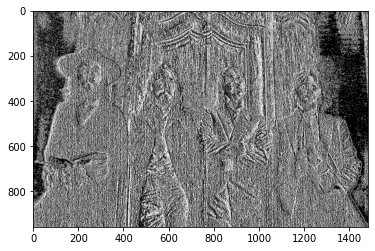

In [11]:
# Sobel filter
ker_sob = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
t = time()
img_sob = filters.conv(beatle,ker_sob)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_sob.astype('uint8'))
plt.show()

19.033674001693726s used


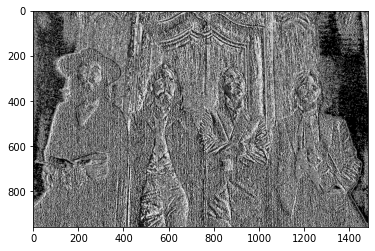

In [12]:
# Sobel filter (separable)
t = time()
img_sepsob = filters.sep_conv(beatle,ker_sob)
print(f'{time()-t}s used')

# Plot image
plt.gray()
plt.imshow(img_sepsob.astype('uint8'))
plt.show()

Part 2: Summed area table for box filter. One can show that the time complexity for this algorithm is O(mn), where m,n are size of the image, so this method will be better when we have a large kernel.

Note we cannot warp image in this case, otherwise we would have negative pixels.

1.927623987197876s used


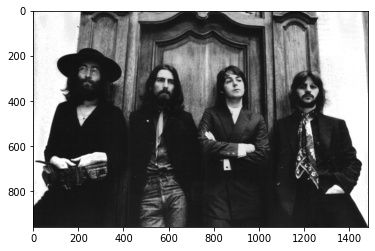

In [4]:
# Example
t = time()
img_table = filters.box_by_table(beatle,4,4)
print(f'{time()-t}s used')

#Plot image
plt.gray()
plt.imshow(img_table.astype('uint8'))
plt.show()

By central limit theorem, we may repeatedly apply box filter to obtain an approximate Gaussian filter effect. Using this approach, we can do it much faster.

2.104518175125122s used


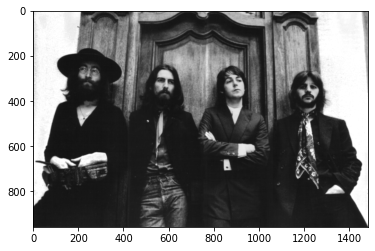

In [6]:
# Approximate Gaussian
t = time()
S = filters.compute_sum(beatle)
img_approx = np.zeros(beatle.shape)
img_approx = beatle
for i in range(30):
    img_approx = filters.box_by_table(img_approx,5,5,S)
print(f'{time()-t}s used')

#Plot image
plt.gray()
plt.imshow(img_approx.astype('uint8'))
plt.show()